# Face recognition using Keras

*Author: Aleksandra Pestka*

## VGG-Face 

We will use the VGG-Face model as an example. Briefly, the VGG-Face model is the same NeuralNet architecture as the VGG16 model used to identity 1000 classes of object in the ImageNet competition. The main difference between the VGG16-ImageNet and VGG-Face model is that researchers feed dedicated training-set images to tune weights for face recognition. 

###  Labeled Faces in the Wild dataset

For the sake of using pre-trained weights we will take advantage of the VGG-Face model which was evaluated on the **Labeled Faces in the Wild** dataset. This dataset contains 13K images of 5K faces collected from the web. 

**Whose photos do we have in this dataset? Let's take a look at labels.**

In [162]:
with open("lfw-names.txt") as file:  
    for line in file: 
        print(line)

AJ_Cook	1

AJ_Lamas	1

Aaron_Eckhart	1

Aaron_Guiel	1

Aaron_Patterson	1

Aaron_Peirsol	4

Aaron_Pena	1

Aaron_Sorkin	2

Aaron_Tippin	1

Abba_Eban	1

Abbas_Kiarostami	1

Abdel_Aziz_Al-Hakim	1

Abdel_Madi_Shabneh	1

Abdel_Nasser_Assidi	2

Abdoulaye_Wade	4

Abdul_Majeed_Shobokshi	1

Abdul_Rahman	1

Abdulaziz_Kamilov	1

Abdullah	4

Abdullah_Ahmad_Badawi	1

Abdullah_Gul	19

Abdullah_Nasseef	1

Abdullah_al-Attiyah	3

Abdullatif_Sener	2

Abel_Aguilar	1

Abel_Pacheco	4

Abid_Hamid_Mahmud_Al-Tikriti	3

Abner_Martinez	1

Abraham_Foxman	1

Aby_Har-Even	1

Adam_Ant	1

Adam_Freier	1

Adam_Herbert	1

Adam_Kennedy	1

Adam_Mair	1

Adam_Rich	1

Adam_Sandler	4

Adam_Scott	2

Adel_Al-Jubeir	3

Adelina_Avila	1

Adisai_Bodharamik	1

Adolfo_Aguilar_Zinser	3

Adolfo_Rodriguez_Saa	2

Adoor_Gopalakarishnan	1

Adrian_Annus	1

Adrian_Fernandez	1

Adrian_McPherson	2

Adrian_Murrell	1

Adrian_Nastase	2

Adriana_Lima	1

Adriana_Perez_Navarro	1

Adrianna_Zuzic	1

Adrien_Brody	12

Afton_Smith	1

Agbani_Darego	1

Agn

Mark_Gottfried	3

Mark_Hamister	2

Mark_Hanson	1

Mark_Heller	2

Mark_Hogan	1

Mark_Hurlbert	5

Mark_Kelly	1

Mark_Komara	1

Mark_Lazarus	1

Mark_Leno	1

Mark_Mariscal	1

Mark_Martin	1

Mark_McClellan	1

Mark_Mishkin	1

Mark_Mulder	1

Mark_Philippoussis	11

Mark_Podlesny	1

Mark_Polansky	1

Mark_Redman	1

Mark_Richt	3

Mark_Rosenbaum	1

Mark_Sacco	1

Mark_Salter	1

Mark_Schweiker	2

Mark_Shapiro	1

Mark_Sisk	1

Mark_Stuart	1

Mark_Swartz	1

Mark_Wahlberg	4

Mark_Warner	2

Markus_Beyer	1

Markus_Naslund	2

Marlene_Weingartner	2

Marlon_Devonish	1

Marquier_Montano_Contreras	1

Marquis_Estill	1

Marricia_Tate	1

Marsah_Ambrosius	1

Marsha_Sharp	1

Marsha_Thomason	1

Marta_Dominguz	1

Martha_Beatriz_Roque	2

Martha_Bowen	2

Martha_Burk	4

Martha_Lucia_Ramirez	4

Martha_Martinez_Flores	1

Martha_Sahagun_de_Fox	1

Martha_Smith	1

Martha_Stewart	5

Martie_Maguire	1

Martin_Bandier	1

Martin_Boryczewski	1

Martin_Brodeur	2

Martin_Brooke	1

Martin_Burnham	1

Martin_Cauchon	2

Martin_Frost	1



*<center> A few samples for the label: Colin Farrell </center>*

![title](Examples_from_LFW_dataset/Colin_Farrell_0001.jpg)
![title](Examples_from_LFW_dataset/Colin_Farrell_0005.jpg)
![title](Examples_from_LFW_dataset/Colin_Farrell_0007.jpg)

As you can see: it is quite a big deal to recognize face. The most challenging is to cope with dyed hair, weird haircut, wearing glasses or hat.

*<center> A few samples for the label: Angelina Jolie </center>*

![title](Examples_from_LFW_dataset/Angelina_Jolie_0005.jpg)
![title](Examples_from_LFW_dataset/Angelina_Jolie_0011.jpg)
![title](Examples_from_LFW_dataset/Angelina_Jolie_0019.jpg)

Well, that's a tough one... <br> But adequately deep neural network should handle it quite well.

We need some powerful network configuration. The structure of the VGG-Face model is demonstrated below.

![title](https://camo.githubusercontent.com/57bfe2876865c09dca8a8faf6f9ffe0c7594f67d/68747470733a2f2f616d6c67697473616d706c65732e626c6f622e636f72652e77696e646f77732e6e65742f666163657265636f2f7265736f75726365732f766767666163652e4a5047)

## Constructing the VGG Face model

In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

Using TensorFlow backend.


In [2]:
def create_model():
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
            
    return model

In [3]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (Zer

In order to save a lot of time will make use of pre-trained weights which were shared by research group from University of Oxford.

In [4]:
model.load_weights("vgg_face_weights.h5")

Given some input tensor(s) and output tensor(s), we can instantiate a Model via:

In [5]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

Take a look at input and output shapes:

In [8]:
vgg_face_descriptor.input

<tf.Tensor 'zero_padding2d_1_input:0' shape=(?, 224, 224, 3) dtype=float32>

In [9]:
vgg_face_descriptor.output

<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [10]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

def image_preprocessing(image_path):
    img = image.load_img(image_path, target_size=(224,224))
    img = image.img_to_array(img) #add channels
    img = np.expand_dims(img, axis=0) #add the number of images
    img = preprocess_input(img) #subtract the mean RGB
    return img

## Similarity measurement 

Ultimately, input images will be represented as vectors. **Our goal is to decide if two photos are the same person or not**. To do this, we have to compare these vector representation somehow. 

We need to find the distance between these vectors. One approach is **cosine distance**, the other one: **euclidean distance**. Cosine distance is equal to 1 minus cosine similarity. <br> There are implementations of these methods below:

In [11]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

Let's say that we will be making decision based on **euclidean distance**. If both images are same person, then measurement should be small. Otherwise, the measurement should be large if two images are different person. Here, epsilon value states threshold.

In [12]:
epsilon = 120 #for euclidean distance

## One shot learning process

In [24]:
def face_verification(img1,img2):
    img1_vector = vgg_face_descriptor.predict(image_preprocessing(img1))[0,:]
    img2_vector = vgg_face_descriptor.predict(image_preprocessing(img2))[0,:]
    
    cosine_distance = findCosineDistance(img1_vector, img2_vector)
    euclidean_distance = findEuclideanDistance(img1_vector, img2_vector)
    
    print("Cosine distance: {:.2f}".format(cosine_distance))
    print("Euclidean distance: {:.2f}".format(euclidean_distance))
    
    print("Epsilon threshold: {:.2f} \n".format(epsilon))
    
    if(euclidean_distance < epsilon):
        print("YES! They are the same person")
    else:
        print("NO! They are NOT the same person!")
        
    #plotting
    fig = plt.figure(figsize=(8,5))
    fig.add_subplot(1, 2, 1)
    plt.imshow(image.load_img(img1))
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1, 2, 2)
    plt.imshow(image.load_img(img2))
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Testing time

It's high time to test our model and evaluate its performance. Choose 2 photos and feed them into network.

In [25]:
!ls Faces_to_test/

Anne_Hathaway_1.jpg   Daniel_Radcliffe_1.jpg  Katy_Perry_1.jpg
Anne_Hathaway_2.jpg   Daniel_Radcliffe_2.jpg  Katy_Perry_2.jpg
Ashton-Kutcher-1.jpg  Freddie_1.jpg	      Prince_1.jpg
Ashton-Kutcher-2.jpg  Freddie_2.jpg	      Prince_2.jpg


Cosine distance: 0.41
Euclidean distance: 89.37
Epsilon threshold: 120.00 

YES! They are the same person


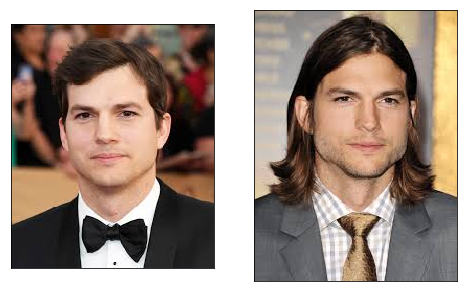

In [26]:
face_verification("Faces_to_test/Ashton-Kutcher-1.jpg", "Faces_to_test/Ashton-Kutcher-2.jpg")

Cosine distance: 0.25
Euclidean distance: 89.97
Epsilon threshold: 120.00 

YES! They are the same person


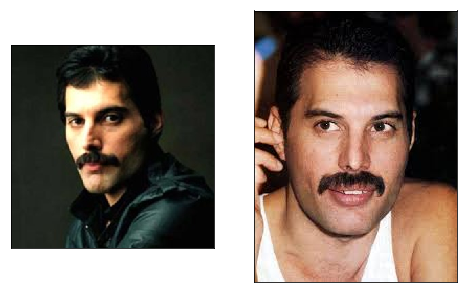

In [27]:
face_verification("Faces_to_test/Freddie_1.jpg", "Faces_to_test/Freddie_2.jpg")

Cosine distance: 0.57
Euclidean distance: 125.72
Epsilon threshold: 120.00 

NO! They are NOT the same person!


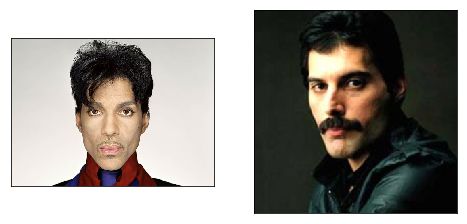

In [28]:
face_verification("Faces_to_test/Prince_2.jpg", "Faces_to_test/Freddie_1.jpg")

Cosine distance: 0.24
Euclidean distance: 91.68
Epsilon threshold: 120.00 

YES! They are the same person


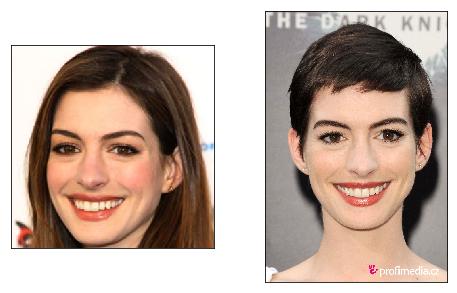

In [29]:
face_verification("Faces_to_test/Anne_Hathaway_1.jpg", "Faces_to_test/Anne_Hathaway_2.jpg")

Cosine distance: 0.43
Euclidean distance: 125.85
Epsilon threshold: 120.00 

NO! They are NOT the same person!


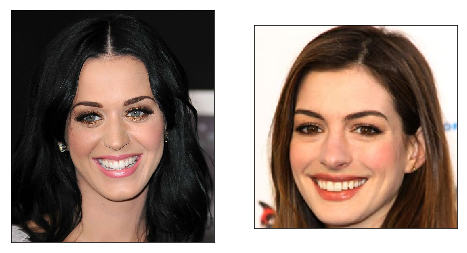

In [30]:
face_verification("Faces_to_test/Katy_Perry_1.jpg", "Faces_to_test/Anne_Hathaway_1.jpg")

Cosine distance: 0.53
Euclidean distance: 98.64
Epsilon threshold: 120.00 

YES! They are the same person


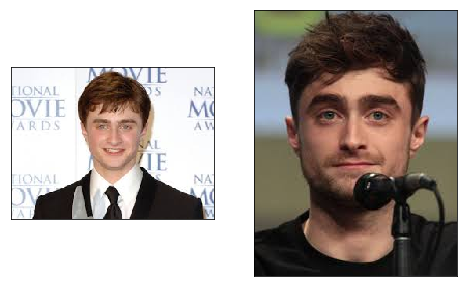

In [31]:
face_verification("Faces_to_test/Daniel_Radcliffe_1.jpg", "Faces_to_test/Daniel_Radcliffe_2.jpg")

## Sources 

- http://www.robots.ox.ac.uk/~vgg/software/vgg_face/
- https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
- https://gist.github.com/EncodeTS/6bbe8cb8bebad7a672f0d872561782d9